<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [ ]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [ ]:
image = np.array(Image.open('lemon.jpeg'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(image.shape)


(100, 100, 3)


## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Part 1 Answers

Shape of image:  (100, 100, 3)
Image shape of img_single_channel:  (100, 100)


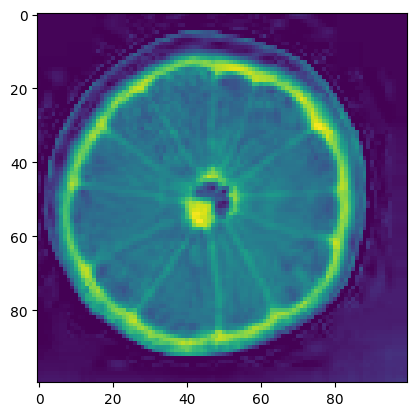

In [ ]:
#1 print image shape
print("Shape of image: ", image.shape)
#2 variable for image with only last color channel
img_single_channel = image[:,:,2]
#3 print image shape
print("Image shape of img_single_channel: ", img_single_channel.shape)
#4 plot image
plt.imshow(img_single_channel)

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Part 2 Answers

Shape of img_average_channel (100, 100)


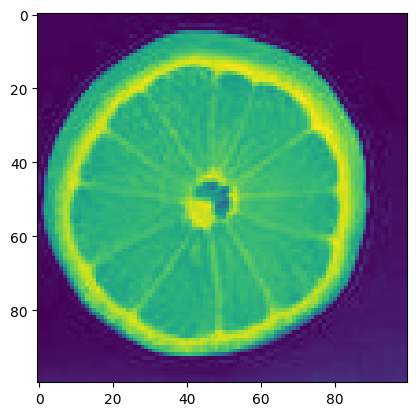

In [89]:
#1 variable for image with only last color channel
img_average_channel = np.mean(image, axis=2)
#2 print image shape
print("Shape of img_average_channel", img_average_channel.shape)
#3 plot image
plt.imshow(img_average_channel)

**Comment on the differences and which one you would say is better:** The image ini part 1 is better because it has more contracst and more of the small details and eaiser to see.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

Part 3 Answers

1. An identity matrix is a square matrix that contains all zeros except
for a diagonal of elemetents that are ones. Multiplying a square matrix by an
identity matrix you get the original square matrix.

In [90]:
#2. create identity matrix
identity_matrix = np.identity(len(img_average_channel))
#3. print random row of identity_matrix
import random
randnum = random.randint(0, len(img_average_channel)-1)
print("Random Row #", randnum)
print(identity_matrix[randnum,:])

Random Row # 44
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


3. I observed in the random row of indentity_matrix that the index that the
single non-zero element sits is always the same index of the row itself in the matrix. You can use print(identity_matrix[randnum,randnum]) to prove the conclusion made by my oberservation. That print statment will always display 1.0.


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

Part 4 Answers

In [97]:
#1 create array of number of rows
rows = np.array(np.arange(len(img_average_channel)))
#2 shuffle array
np.random.shuffle(rows)
#3 print array
print(rows)

[35 52 95 75 94 39 36 58 53 49 10 50 97 63 34 87 38 85 43 16 69 81 45 59
 98 27 29 65 47 96 72 18 15 67  8 46 54 66 55 86 74 64 28 12 88 42 23 31
 79 22  7 48 68 71 62 19 76 37 21 51 25 44 24  0 73 14 99 32 56 17 83  6
 61 84  3 40 89 90 92 11  9 30 13  2 41 57 78 77 20  5 33  1 60 82 91 70
 26 93 80  4]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


Part 5 Answers

In [98]:
#1 create matrix T
T = identity_matrix[rows,:]

2. We are scrambled an identity matrix where every rows now has one non-zero
element but the non-zero elements do not appear in any particular order.

In [99]:
#3 print shape of T
print(T.shape)

(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Part 6 Answers

(100, 100)


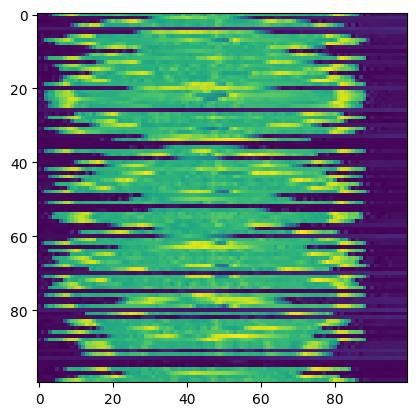

In [100]:
#1 multiply T and img_average_channel and check shape
transformed_image = np.matmul(T,img_average_channel)
print(transformed_image.shape)
#2 plot transformed_image and describe pattern
plt.imshow(transformed_image)

2. I see a jagged rectangular pattern that goes form top to bottom and
maintains roughly consist width.

3. The transformation is swapping rows around in the image matrix so values in
the image matrix are zeroed out by matrix T matching the random order of the T matrix.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Part 7 Answers

1. Matrix T is invertiable. The way to show that a square matrix like T is
invertible is to check if whether its determinant is equal to zero. When we use
np.linalg.det(T) to get the dterminant we see that it is not zero so matrix T it has
an inverse/is intvertible.


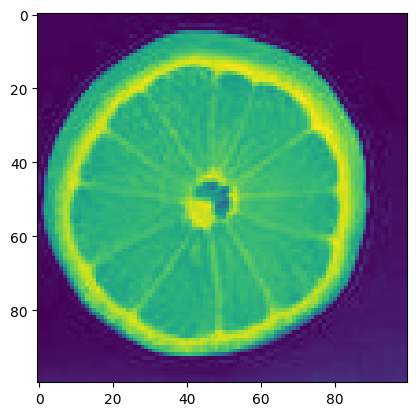

In [101]:
#2 compute inverse
Tinv = np.linalg.inv(T)
#3 inverse scrambling and plot
unscrambled_image = np.matmul(Tinv, transformed_image)
plt.imshow(unscrambled_image)

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


Part 8 Answer


The only change I made to perform the same operation on the columns instead of rows was changed the order of how the matrices are multiplied. Unlike in regular multiplication, order matters in matrix multiplication.

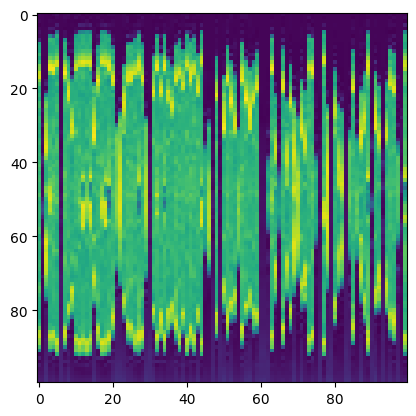

In [102]:
# create array of number of cols
cols = np.array(np.arange(len(img_average_channel)))
# shuffle array
np.random.shuffle(cols)
# create natrix T with cols
T = identity_matrix[cols]
# multiply T and img_average_channel and check shape
transformed_cols_image = np.matmul(img_average_channel, T)
# plot transformed_image and describe pattern
plt.imshow(transformed_cols_image)


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.